<a href="https://colab.research.google.com/github/Allisonolazabal-collab/Voter-Registration-from-2016-and-2020/blob/main/Allison_Olazabal_Midterm_Project_325_Spring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 6.55 MiB/s, done.
Resolving deltas: 100% (13/13), done.


Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [3]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



In [4]:
#The main goal of my project is to show how new voter registrations within 12 states from 2016 and 2020 declined the most during the months of March and April in 2020.

In [5]:
#Its important for someone to read this notebook to recognizes how Covid may have influenced the number of voter registrations, and different factors influencing the numbers such as the state and month.

In [6]:

#Question 1: Which months had the biggest decline in voter registrations from 2016 to 2020?

In [7]:
#Question 2: In Florida, what months spiked or dipped in voter registration comparing 2016 to 2020?

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [8]:
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


In [9]:
#Year accounts from only the years of voting for the election in 2016 and 2020

In [10]:
#Month accounts for the month voters voted in

In [11]:
#New registered voters accounts for the the new total number of voters gained that voted within the Month, Year, and Jurisdiction of the election

In [12]:
#Jurisdiction accounts for the states included within the dataset

Check for any missing data data. (1 point)

In [13]:
voters.isnull().values.any()

False

Check your data types. (1 point)

In [14]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [15]:
voters = voters.rename(columns={"Jurisdiction":"NAME"})

In [16]:
voters = voters.rename(columns={"New registered voters":"registered_voters"})

Explain any potential limitations to your data (2 points)

In [17]:
#There is no column to compare the change in the total amount of new voters from 2016 to 2020, to analyze the change that happened from the two elections

In [18]:
#We can't examine certain demographics that are or are not contributing to the decline in voter registrations post-COVID in 2020

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [19]:
voters.loc[voters.registered_voters==voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


What is the average voter registration? (1 points)

In [20]:
voters["registered_voters"].mean()

48223.46226415094

In [21]:
Average = voters["registered_voters"].mean()

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [22]:
high_voters = voters.loc[voters.registered_voters > Average]

In [23]:
high_voters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1 to 93
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAME               36 non-null     object
 1   Year               36 non-null     int64 
 2   Month              36 non-null     object
 3   registered_voters  36 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


In [24]:
#There are 36 times where the voter registration was higher than the average

How many times did each state go above the national average for new voter registration? (2 points)



In [25]:
high_voters.head(36)

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


In [26]:
#Arizona: 3x, California: 7x, Florida: 7x, Georgia: 1x, Illinois: 4x, North Carolina: 6x, Texas: 8x

In [27]:
#Colorado, Deleware, District of Columbia, Maryland, Virginia did not go above the national average, so zero times

Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [28]:
state_averages = voters.groupby("NAME")["registered_voters"].mean()

In [29]:
state_averages.sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

In [30]:
total_voters = voters.groupby("NAME")["registered_voters"].sum().sort_values(ascending=False)
total_voters = pd.DataFrame(total_voters)

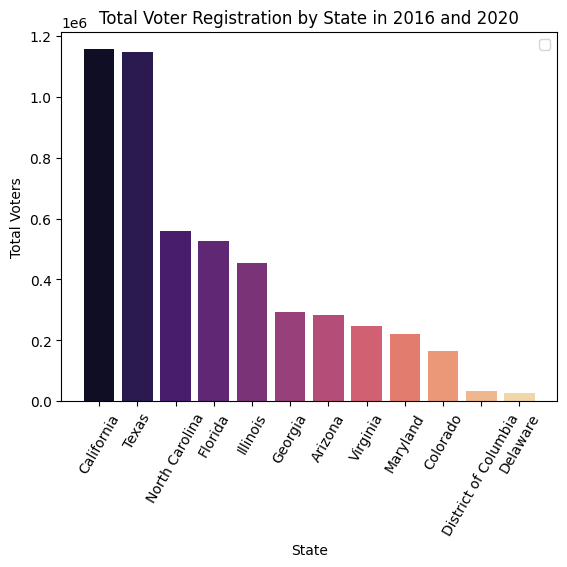

In [31]:
sns.barplot(total_voters, x = "NAME", y="registered_voters", palette = "magma", hue="NAME")
plt.legend(labels=[],title="")
plt.plot(figsize = [20,20])
plt.xlabel("State")
plt.ylabel("Total Voters")
plt.title("Total Voter Registration by State in 2016 and 2020")
plt.xticks(rotation=60)
plt.show()

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

In [32]:
colors = ["crimson", "orange", "green", "teal", "blue"]
months_order = ["January", "February", "March", "April", "May"]

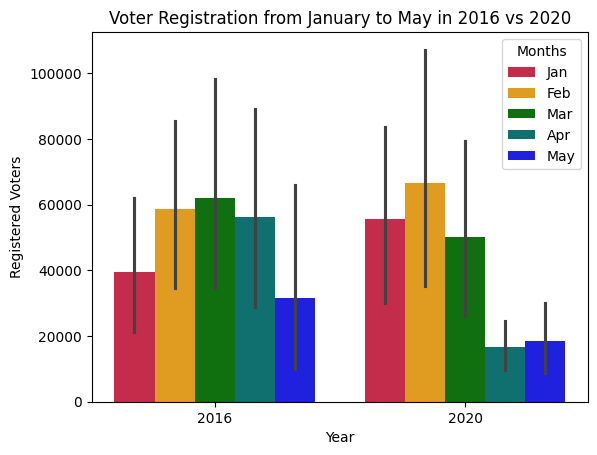

In [33]:
sns.barplot(voters, x = "Year", y="registered_voters", palette=colors, hue="Month")
plt.legend(title="Months")
plt.plot(figsize = [20,20])
plt.xlabel("Year")
plt.ylabel("Registered Voters")
plt.title("Voter Registration from January to May in 2016 vs 2020")
plt.show()

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

In [34]:
Florida = voters.loc[voters.NAME=="Florida"]

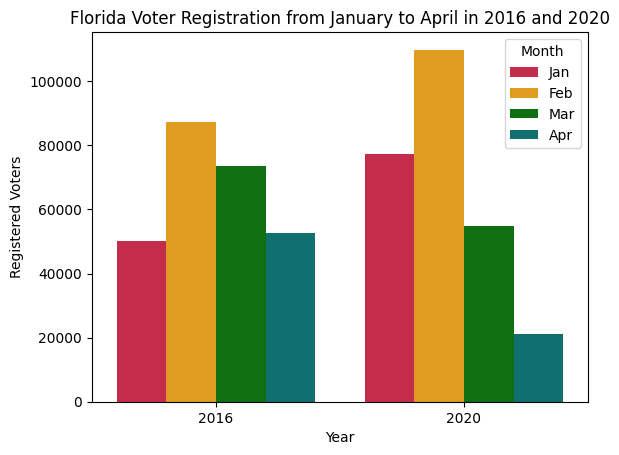

In [35]:
sns.barplot(Florida, x="Year", y="registered_voters", palette = ["crimson", "orange", "green", "teal"], hue="Month")
plt.xlabel("Year")
plt.ylabel("Registered Voters")
plt.title("Florida Voter Registration from January to April in 2016 and 2020")
plt.show()

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [36]:
shapefile = "/content/325-Datasets/cb_2018_us_state_500k.shp"
states = gpd.read_file(shapefile)

Set our continental US bounding box to us for the next questions. (2 points)

In [37]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

In [38]:
bbox = states.cx[minx:maxx, miny:maxy]
plt.show()

Create a dataframe that shows the average voter registration per state. (2 points)

In [39]:
avg_voters = voters.groupby("NAME")["registered_voters"].mean().reset_index()

Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [40]:
bbox.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [41]:
avg_voters.head(12)

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


In [42]:
state_avg = bbox.merge(avg_voters, how="inner", on="NAME")

In [43]:
state_avg.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

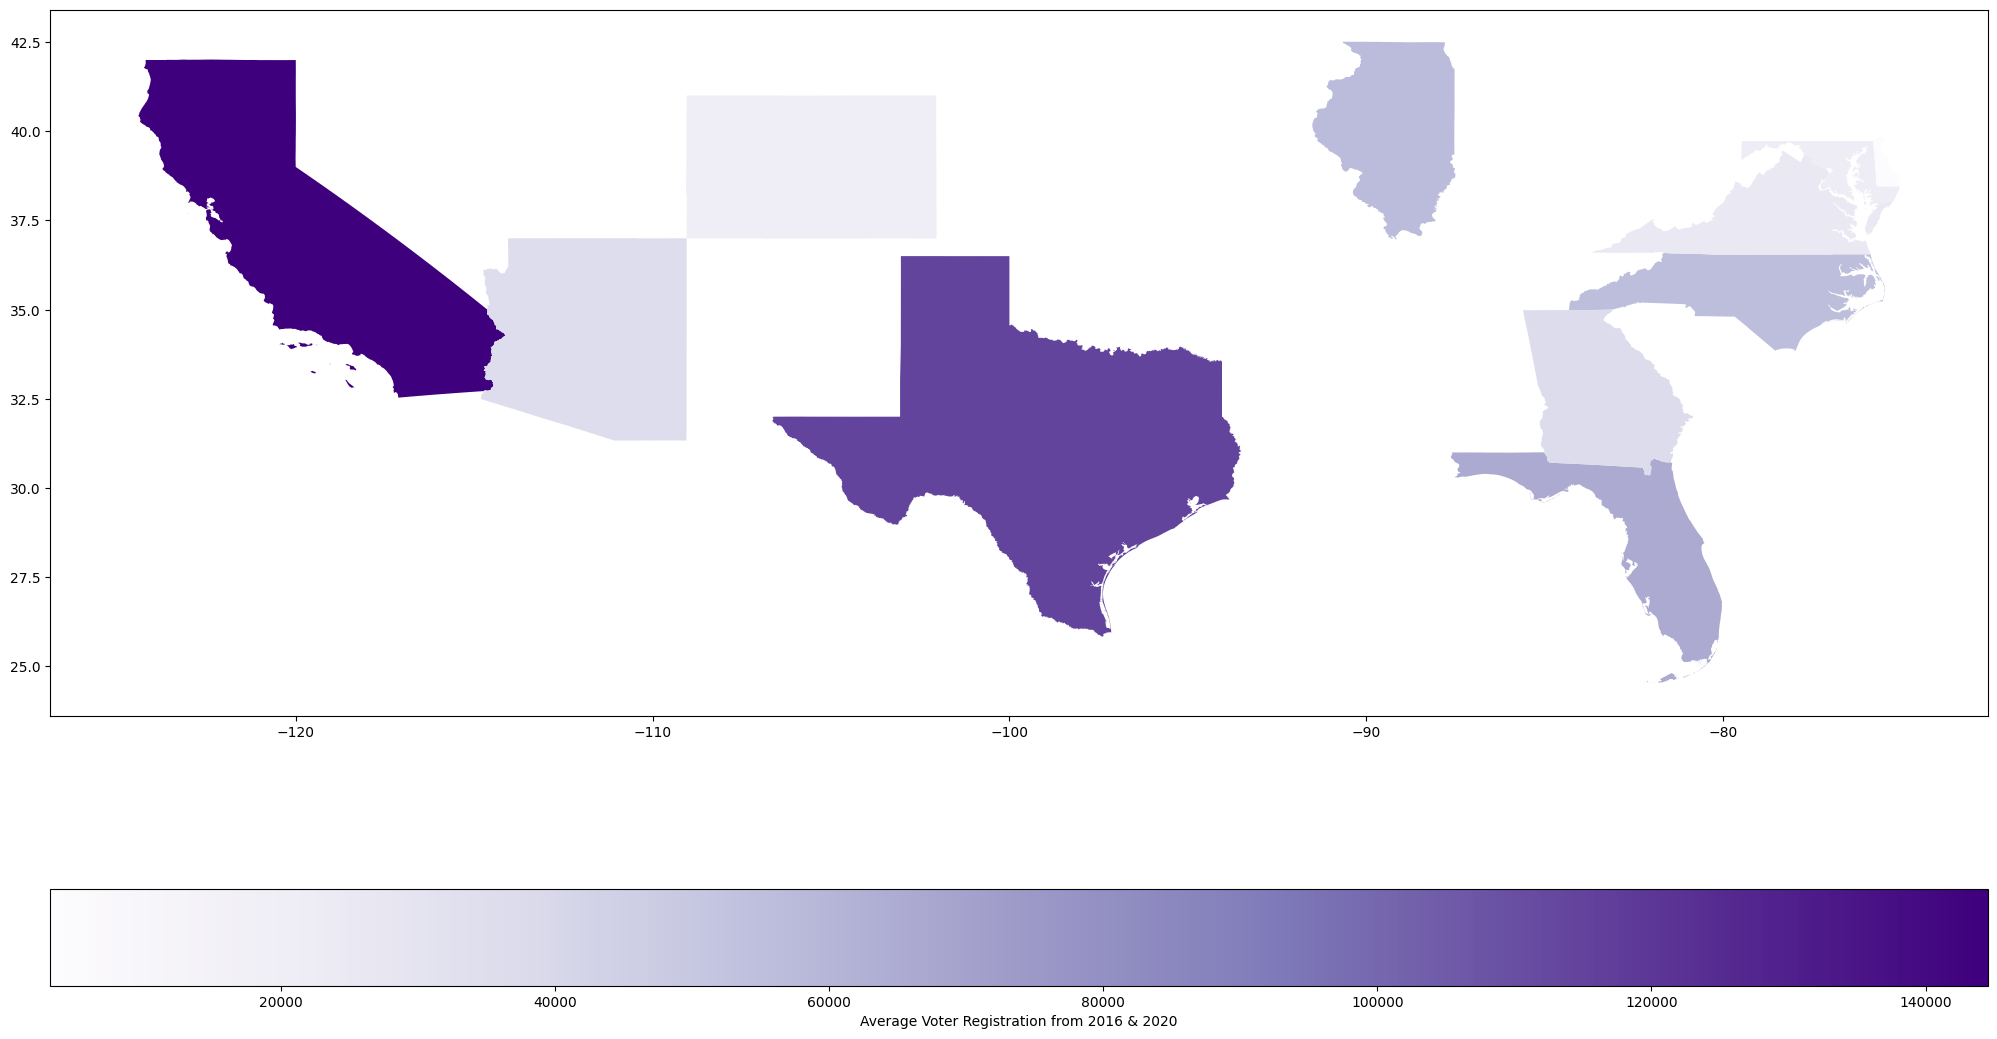

In [47]:
fig=plt.figure(1,figsize=(25,15))
ax=fig.add_subplot()
state_avg.plot(column="registered_voters", ax=ax, legend=True,cmap="Purples",
            legend_kwds={"label": "Average Voter Registration from 2016 & 2020",
            "orientation": "horizontal"})
plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [45]:
#Allison Olazabal